Loading required package: ncdf4
Loading required package: raster
Loading required package: sp


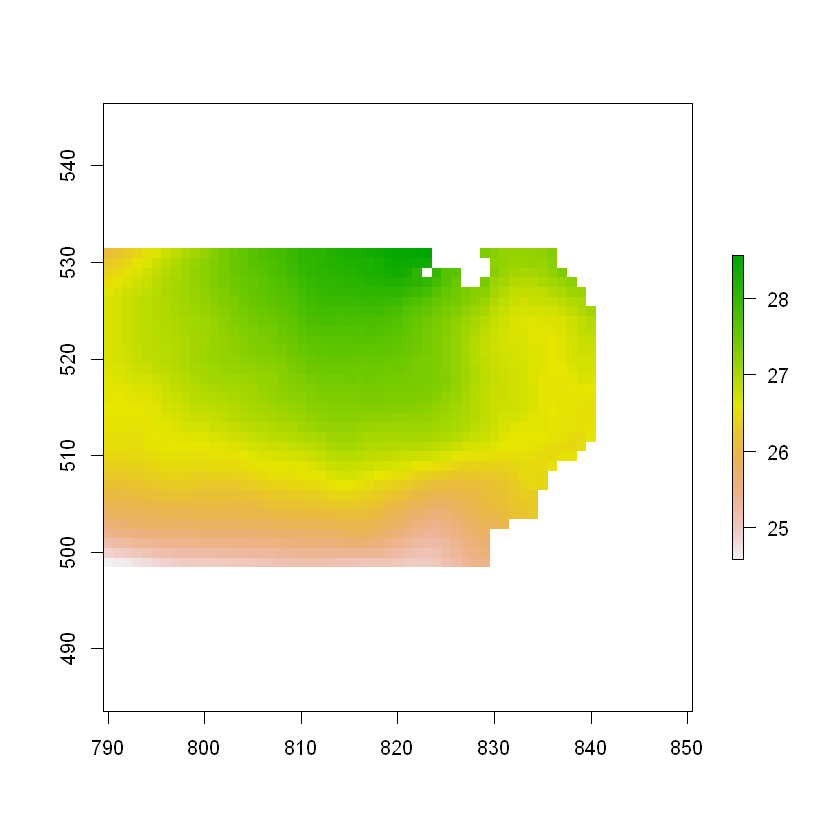

In [1]:
#Clase Virtual Lunes 11 Febrero
require(ncdf4)
#ncdf4 paquete requerido para abrir ese tipo de archivos
require(raster)
ruta="C:/Users/UNIVERSIDAD/Documents/Modelacion Dinamica/11 Feb"
setwd(ruta)
tempe=raster("TSM_Serie.nc",band=133,level=1) 
#band = tiempo (1:420) y level = profundidad (1:31)
#THUS band=133 level=1 significa a 1971 a nivel de superficie
plot(tempe)

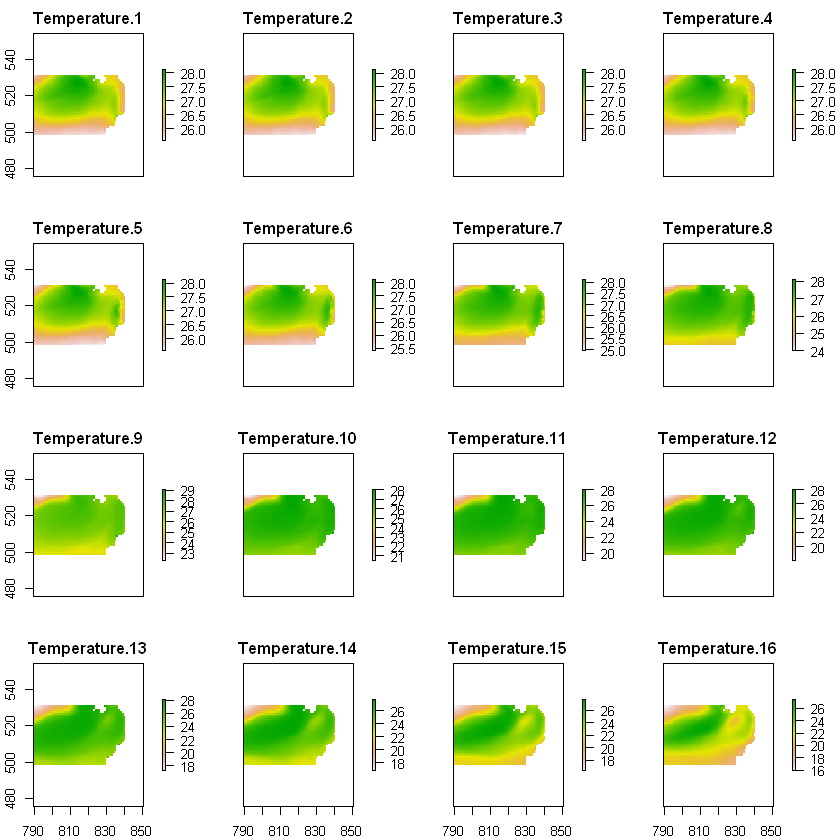

In [2]:
tempe=list() #tiene informacion de los 31 layers
for(i in 1:31){
  tempe[[i]]=raster("TSM_Serie.nc",band=1,level=i)
}

tempe=stack(tempe)

plot(tempe[[1:31]])

Loading required package: rasterVis
Loading required package: lattice
Loading required package: latticeExtra
Loading required package: RColorBrewer
Loading required package: levelplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'levelplot'"

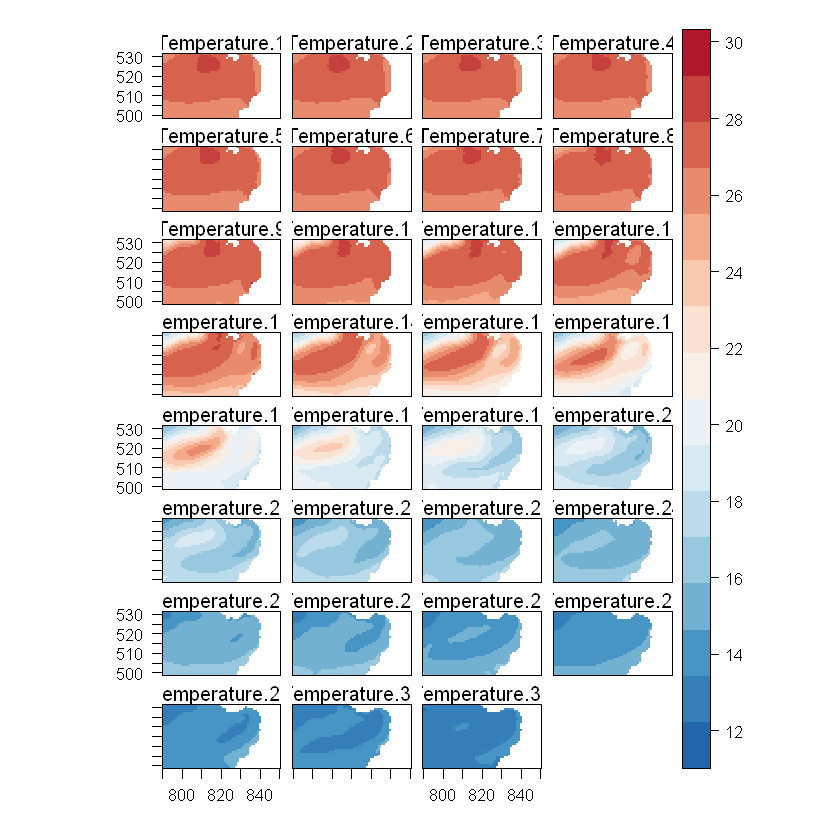

In [3]:
require(rasterVis) #standariza las graficas
require(levelplot)
levelplot(tempe,par.settings=BuRdTheme())

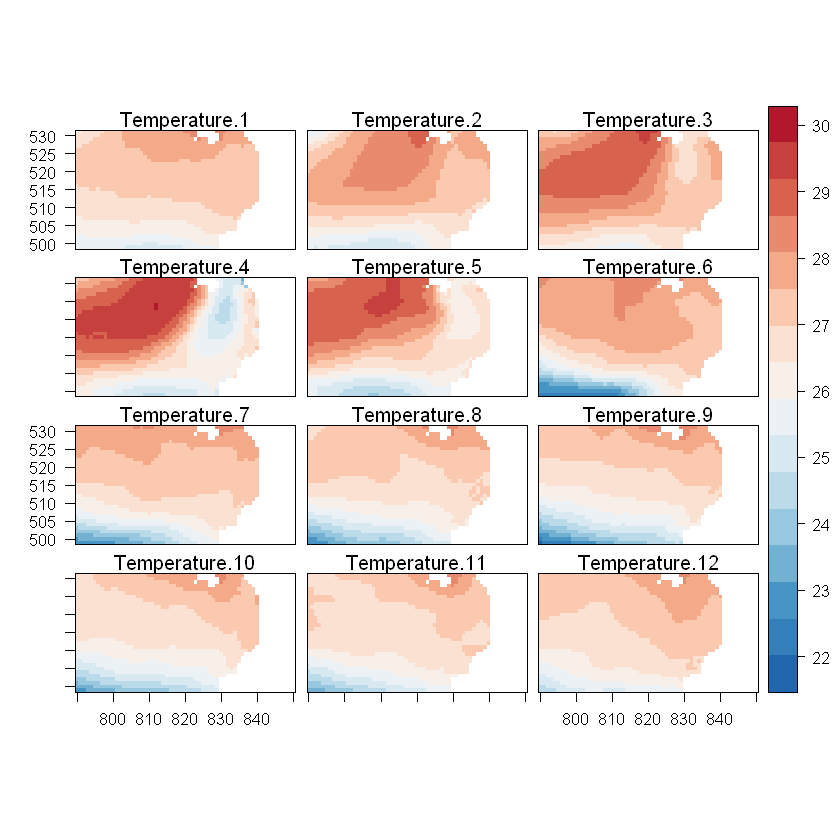

In [4]:
#Ahora cargando los ultimos 10 anos y 1 mes
tempe2=list() 
for(i in 300:420){
  tempe2[[i-299]]=raster("TSM_Serie.nc",band=i,level=1)
}
tempe2=stack(tempe2)
levelplot(tempe2[[1:12]],par.settings=BuRdTheme())

In [5]:
#ahora parandonos en una coordenada
coord=cbind.data.frame(810,520)
tempe_serie=extract(tempe2,coord)
tempe_serie=as.numeric(tempe_serie)

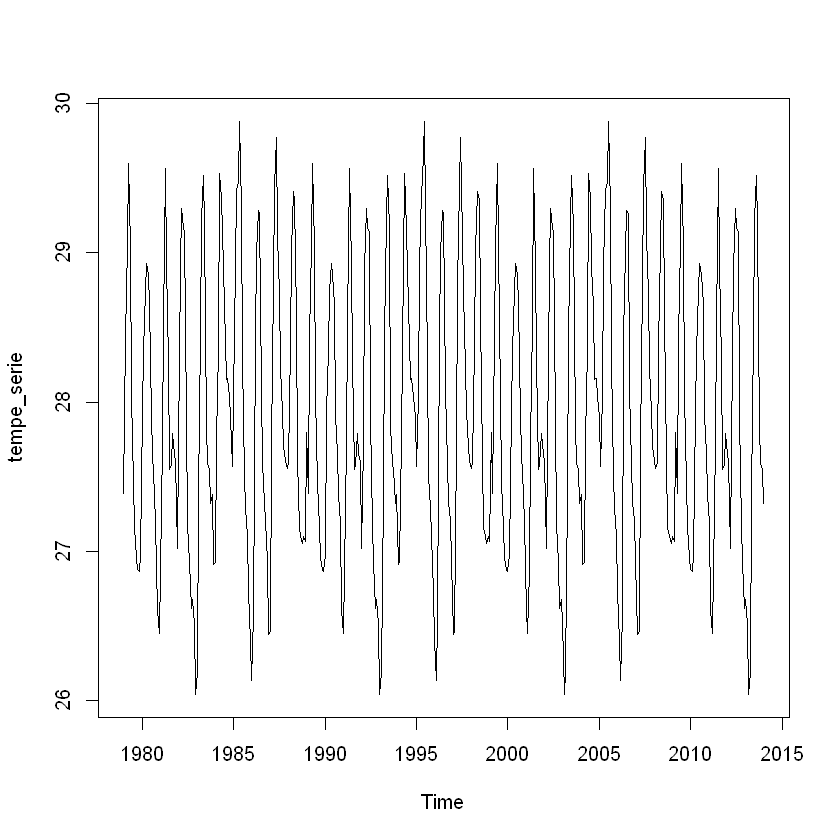

In [6]:
#haciendo el analisis de la serie de tiempo 
tempe_serie=ts(data = tempe_serie,start = 1979,end = 2014,frequency = 12)
plot(tempe_serie)

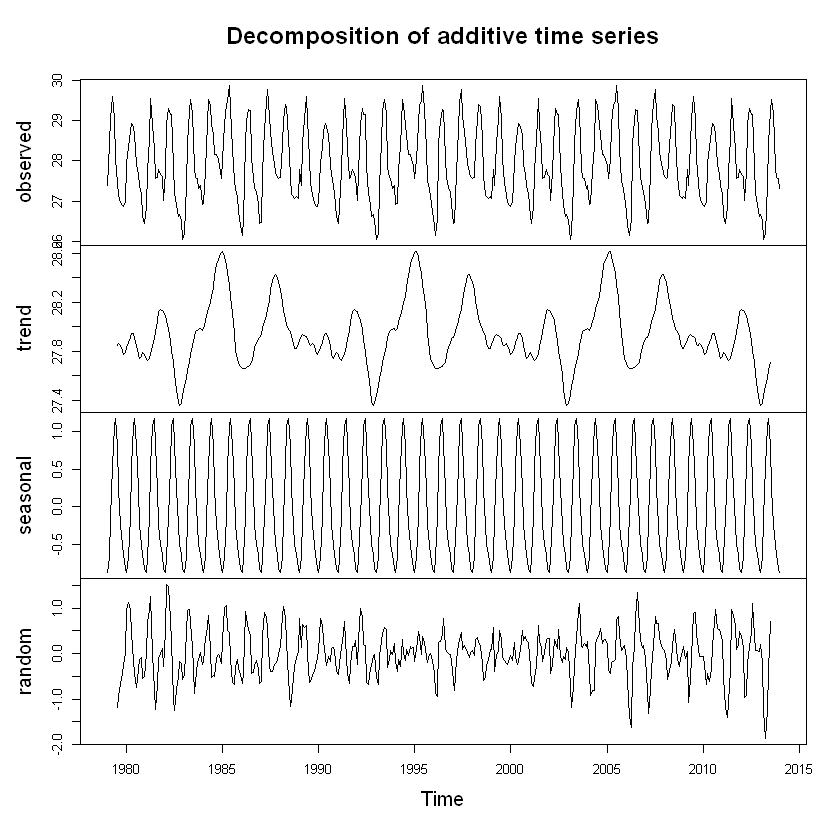

In [7]:
descomp=decompose(tempe_serie)
plot(descomp)

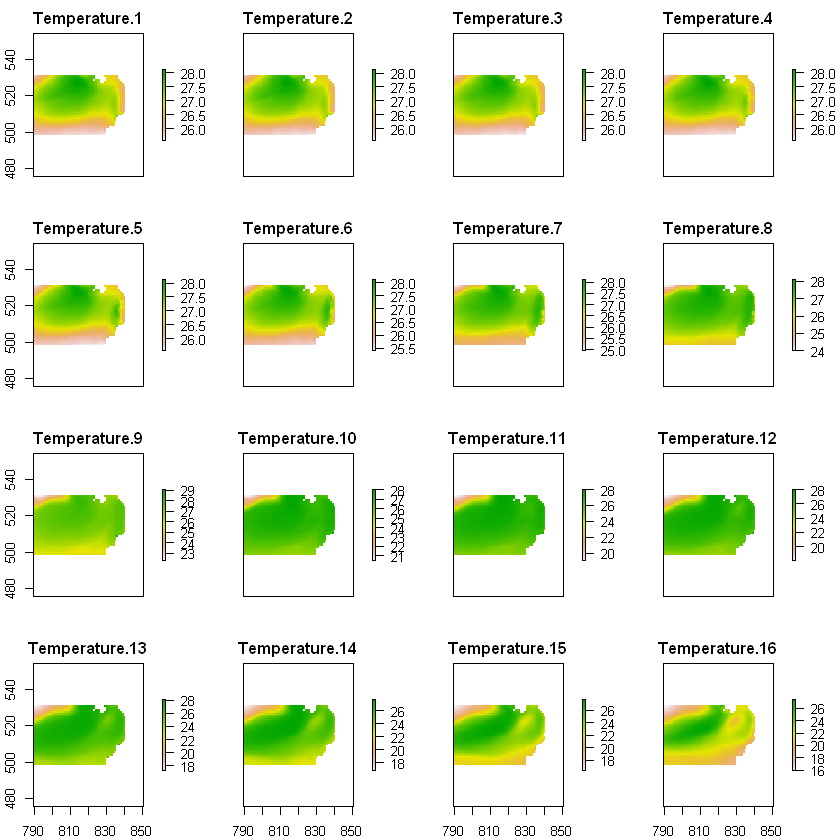

In [8]:
#Ahora para determinar la termoclina
tempe=list()
for(i in 1:31){
  tempe[[i]]=raster("TSM_Serie.nc",band=1,level=i)
}
tempe=stack(tempe)

plot(tempe[[1:31]])

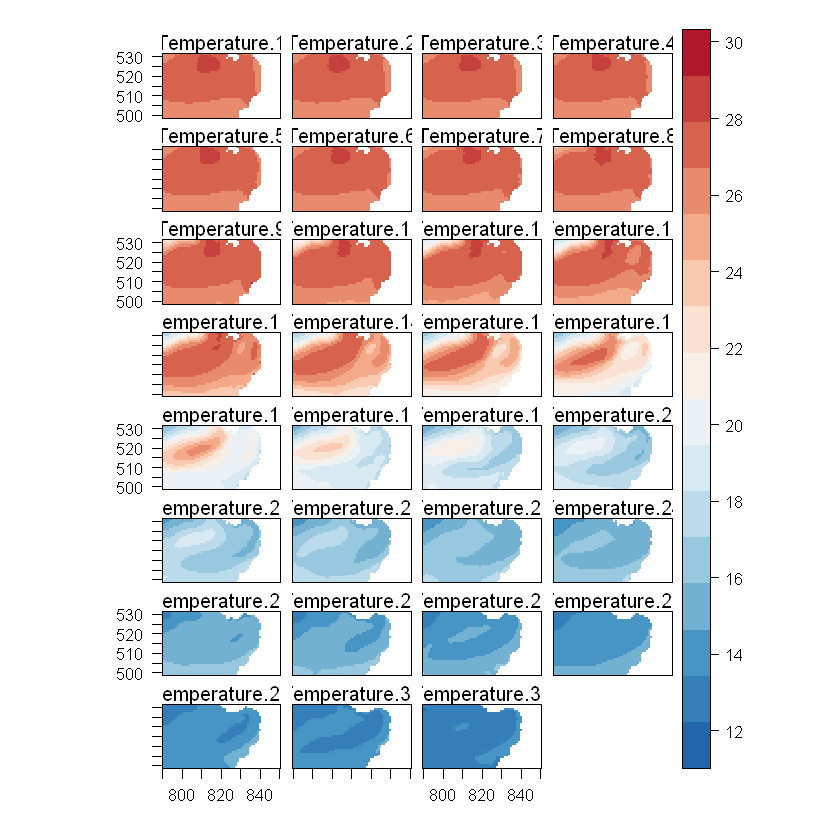

In [9]:
require(rasterVis)
levelplot(tempe,par.settings =BuRdTheme())

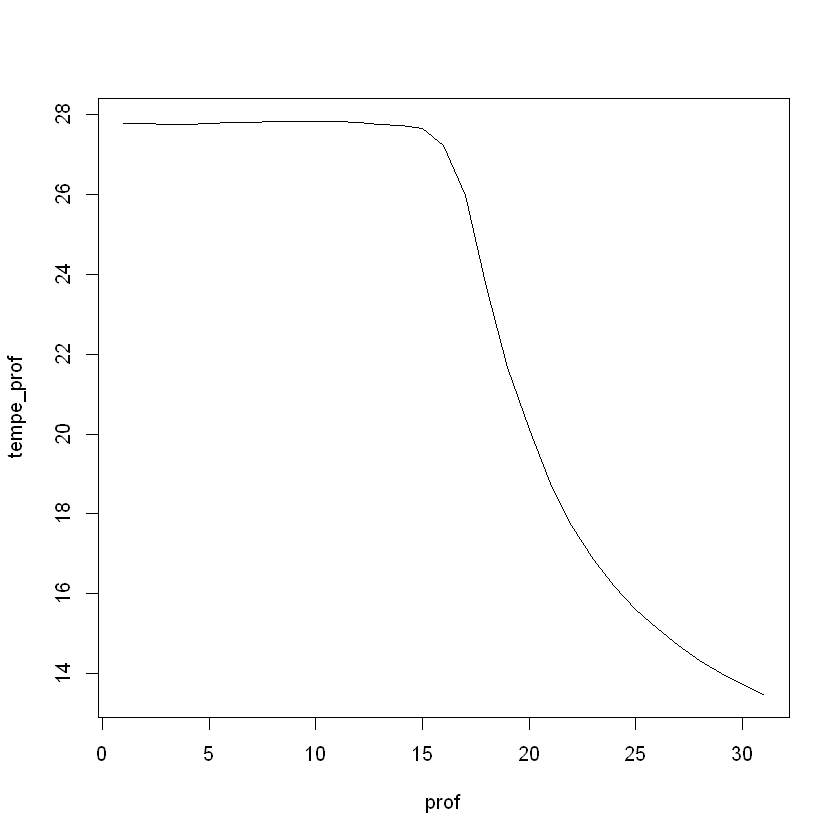

[1] 17

x,y
790,531
791,531
792,531
793,531
794,531
795,531
796,531
797,531
798,531
799,531


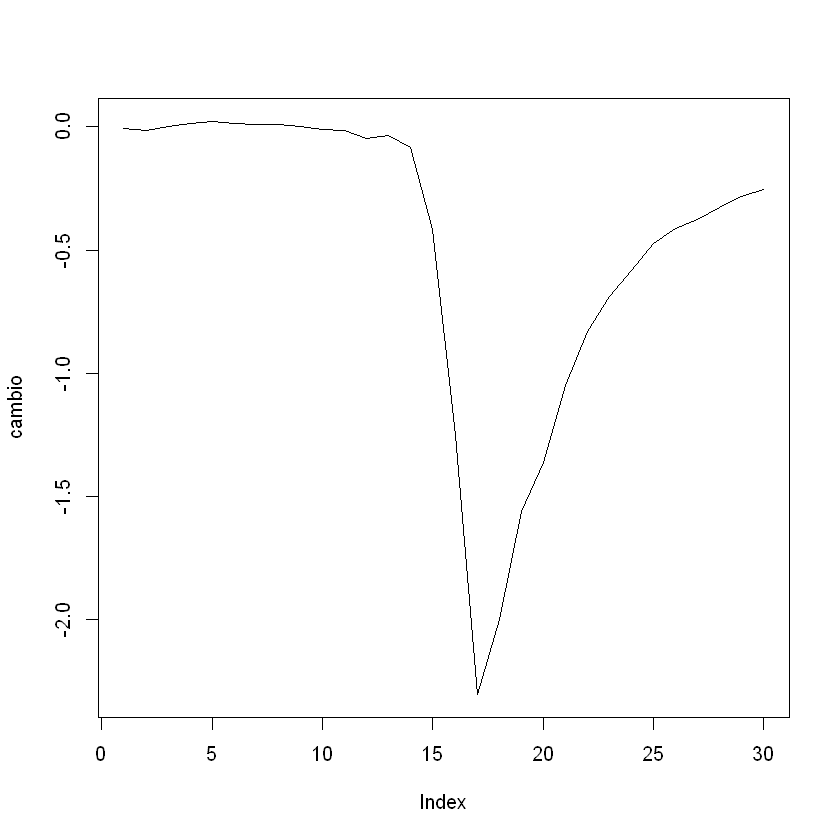

In [10]:
coord=cbind.data.frame(810,520)
tempe_prof=extract(tempe,coord)
tempe_prof=as.numeric(tempe_prof)

prof=1:31
plot(prof,tempe_prof,type="l")
cambio=round(diff(tempe_prof),3)
plot(cambio,type="l")

which(cambio==min(cambio))
#el resultado que nos arroja es 17, tendriamos que ir a panoply y ver eso que nos arroja
#osea 17 es la posicion, y en panoply nos dice que 
#Termoclina: profundidad en que ocurre la transicion:41.18m-47. 

#HACER MAPA DE LA TERMOCLINA
coordinates(tempe) #todas las coordenadas del raster= 2013 celdas
coord=cbind.data.frame(810,520) #irle dando las coordenadas de cada pixel
#luego hacemos la grafica 

In [11]:
##Tratando de incorporar lo que hizo el profe David
require(rgdal)
#empiezo creando un ciclo que incluya todos los periodos
calcula_termoclina=function(mes){
  temp_superficial=list()
  for (i in 1:31) {
    ruta1="C:/Users/UNIVERSIDAD/Documents/Modelacion Dinamica/11 Feb"
    temp=raster(ruta,level=i,band=mes)
    #copiamos las georeferenciacion de un raster que ya esta OK
    ruta2="C:/Users/UNIVERSIDAD/Documents/Modelacion Dinamica/18 Feb"
    capa_base=raster(ruta2)
    capa_base[]=temp[]
    temp_superficial[[i]]=capa_base
  }
  temp_superficial=stack(temp_superficial)
  #hasta aqui lo que se hizo fue crear un arreglo con las temperaturas superficiales, extrayendolas del raster

ERROR: Error in parse(text = x, srcfile = src): <text>:17:0: unexpected end of input
15:   temp_superficial=stack(temp_superficial)
16:   #hasta aqui lo que se hizo fue crear un arreglo con las temperaturas superficiales, extrayendolas del raster
   ^


In [12]:
names(temp_superficial)=paste("prof",1:31,sep="_") #renombrando
  matrix_temps=temp_superficial[] #almacenando
  termoclina=array(NA,2013) #creando un array con los 2013 pixeles que tiene el raster?
  for (i in 1:2013) {
    if (sum(is.na(matrix_temps[i,]))==0){ #eliminando celdas vacias
      cambios=diff(matrix_temps[i,]) #calculando cambios
      termoclina[i]=which(cambios==min(cambios))} 
    else {}
    print(i)
  }
  for (i in 1:31) {
    termoclina_map=temp_superficial[[i]]
    names(termoclina_map)=paste("termoclina",mes,sep = "_")
    termoclina_map[]=as.numeric(termoclina)
    return(termoclina_map)}
}

ERROR: Error in parse(text = x, srcfile = src): <text>:16:1: unexpected '}'
15:     return(termoclina_map)}
16: }
    ^
